### How does the imported datasets look like?
Here we show how the impoted predictors and predictand datasets look like. We show for one example of the weather station (stuttgart) and predictor (tp: total precipitation)
1. read the csv file loaded as Weather station object using pandas 
2. demonstrate the structure of the ERA5 datasets used predictor sets for this exercise


In [3]:
# set paths to the datasets
stationdir = "C:/Users/dboateng/Desktop/Python_scripts/ESD_Package/examples/tutorials/data"
predictordir = "C:/Users/dboateng/Desktop/Datasets/ERA5/monthly_1950_2021/"
name_station= "stuttgart.csv"
filename_predictor = "tp_monthly.nc"

In [2]:
import os
import pandas as pd
import xarray as xr

In [4]:
# read the station data
df = pd.read_csv(os.path.join(stationdir, name_station))

In [5]:
df.head(10)

,Station,Stuttgart (Schnarrenberg)
0,Latitude,48.8281
1,Longitude,9.2
2,Elevation,314.0
3,NaN,NaN
4,Time,Precipitation
5,1958-01-01,51.6
6,1958-02-01,107.3
7,1958-03-01,21.5
8,1958-04-01,54.2
9,1958-05-01,72.1


You can see that the data structure is very simple, first 4 rows contain the station information, and the rest is the Time and precipitation measurement

In [6]:
#read the predictor
data = xr.open_dataset(os.path.join(predictordir, filename_predictor))

In [7]:
data

<xarray.Dataset>
Dimensions:    (time: 860, longitude: 1440, latitude: 721)
Coordinates:
    expver     float64 ...
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-08-01
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.5 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Sat Oct 02 22:01:38 2021: cdo -s -f nc -selname,tp ERA5_195...
    CDO:          Climate Data Operators version 1.9.5 (http://mpimet.mpg.de/...

Here, the ERA5 dataset we loaded is a global datasets with the tp as the variable name, which is provided in the predictors list. We can even plot the global datasets for on time step

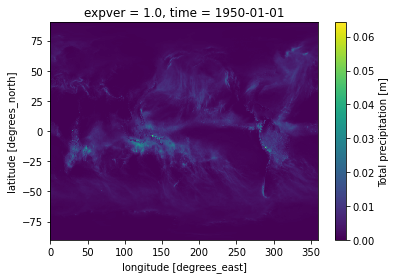

In [9]:
data.tp.sel(time="1950-01-01").plot()